In [2]:

import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score



/Users/th/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df=pd.read_csv('data/kc_house_data.csv')

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [464]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [465]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [466]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


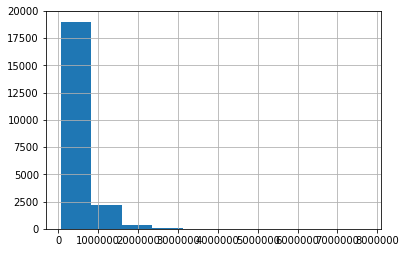

In [504]:
df.price.hist()

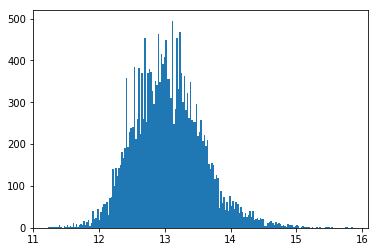

In [505]:
plt.hist((np.log(df.price)), bins=200);

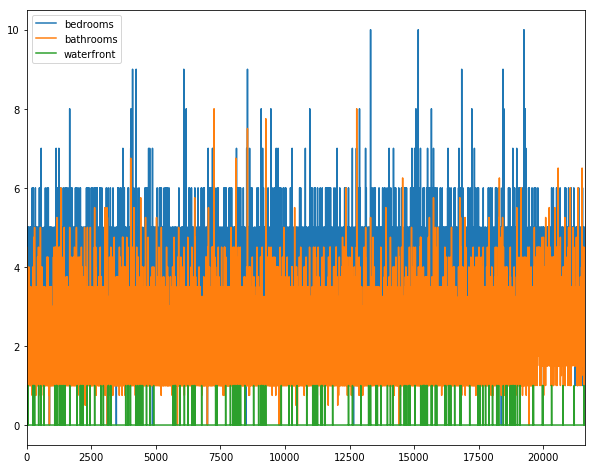

In [506]:
plt.figure(figsize=(10,8))
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend();

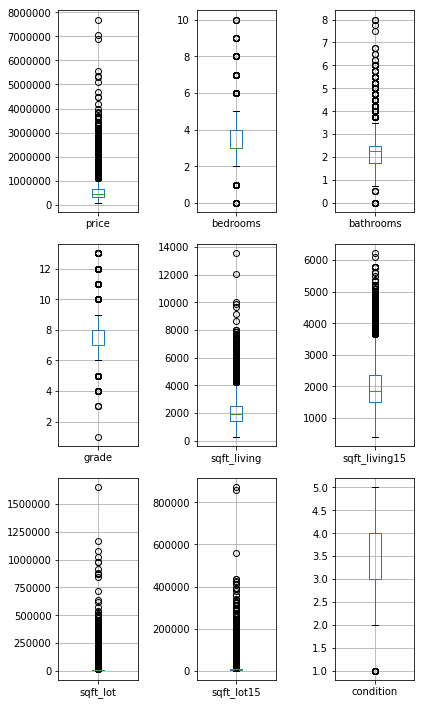

In [507]:
fig = plt.figure(figsize=(6,10))
ax1 = plt.subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
ax9 = plt.subplot(339)
df.boxplot(column='price', ax=ax1)
df.boxplot(column='bedrooms', ax=ax2)
df.boxplot(column='bathrooms', ax=ax3)
df.boxplot(column='grade', ax=ax4)
df.boxplot(column='sqft_living', ax=ax5)
df.boxplot(column='sqft_living15', ax=ax6)
df.boxplot(column='sqft_lot', ax=ax7)
df.boxplot(column='sqft_lot15', ax=ax8)
df.boxplot(column='condition', ax=ax9)
plt.suptitle('')
plt.tight_layout()

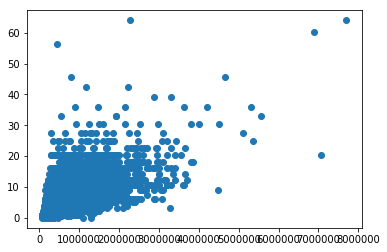

In [511]:
plt.scatter(df.price, (df.bathrooms)**2)

In [468]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [469]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [470]:
df.set_value(15870,'bedrooms',3)
df.set_value(8757,'bedrooms',3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [471]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.369083,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.906483,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [472]:
#df.quantile(.97).astype('int')

#değeri interger olan tüm verilerin %97 nin dışında kalanları siler

In [473]:
df[df['bedrooms']>10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [474]:
x,y=df[['waterfront','floors','bedrooms','bathrooms','sqft_living','view','grade','sqft_above','sqft_basement','lat','sqft_living15']],df['price']

In [475]:
x['zipcode']=df['zipcode'].astype('category')
x['age']=2017-df['yr_built']
#x['yr_renovated']=2017-df['yr_renovated']
 


#datayı düzenledik kategorize ettik

/Users/h/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/h/anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [476]:
x.head()

,waterfront,floors,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15,zipcode,age
0,0,1.0,3,1.00,1180,0,7,1180,0,47.5112,1340,98178,62
1,0,2.0,3,2.25,2570,0,7,2170,400,47.7210,1690,98125,66
2,0,1.0,2,1.00,770,0,6,770,0,47.7379,2720,98028,84
3,0,1.0,4,3.00,1960,0,7,1050,910,47.5208,1360,98136,52
4,0,1.0,3,2.00,1680,0,8,1680,0,47.6168,1800,98074,30


In [477]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [478]:
import statsmodels.api as sm
x=sm.add_constant(x)

In [479]:
x.head()

,const,waterfront,floors,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15,zipcode,age
0,1.0,0,1.0,3,1.00,1180,0,7,1180,0,47.5112,1340,98178,62
1,1.0,0,2.0,3,2.25,2570,0,7,2170,400,47.7210,1690,98125,66
2,1.0,0,1.0,2,1.00,770,0,6,770,0,47.7379,2720,98028,84
3,1.0,0,1.0,4,3.00,1960,0,7,1050,910,47.5208,1360,98136,52
4,1.0,0,1.0,3,2.00,1680,0,8,1680,0,47.6168,1800,98074,30


In [480]:
from sklearn import linear_model

In [481]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=13)

In [482]:
print ("Values in X_train",x_train)
print ("Values in y_train",y_train)

Values in X_train        const  waterfront  floors  bedrooms  bathrooms  sqft_living  view  \
1571     1.0           0     1.0         4       1.50         2000     0   
16330    1.0           0     2.0         4       2.50         2630     0   
12786    1.0           0     2.5         4       2.50         2620     0   
12524    1.0           0     2.0         3       2.50         1610     0   
16179    1.0           0     1.0         3       1.00          880     0   
8993     1.0           0     1.5         3       1.75         2340     0   
7301     1.0           0     2.0         3       2.50         2740     0   
11787    1.0           0     2.0         4       3.50         4340     0   
3957     1.0           0     2.0         5       3.50         4180     2   
5198     1.0           0     1.0         3       1.75         2080     0   
19900    1.0           0     3.0         4       2.00         1390     0   
14665    1.0           0     1.0         3       1.00          870    

In [483]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((17290, 14), (4323, 14), (17290,), (4323,))

In [484]:
reg=linear_model.LinearRegression()
regmodel=reg.fit(x_train,y_train)

In [485]:
y_pretest=regmodel.predict(x_test)
y_pretest

array([ 381010.50539932,  209612.22977432,  127269.63914932, ...,
        469673.23477432,  366577.36164933,  305559.39539932])

In [486]:
(mean_squared_error(y_test,y_pretest))**0.5

193690.70611949053

In [487]:
r2_score(y_test,y_pretest)

0.70974670041474841

In [488]:
x=pd.get_dummies(x,drop_first=True)

In [489]:
x.describe()

,const,waterfront,floors,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,1.0,0.007542,1.494309,3.369083,2.114757,2079.899736,0.234303,7.656873,1788.390691,291.509045,...,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.012955,0.014667
std,0.0,0.086517,0.539989,0.906483,0.770163,918.440897,0.766318,1.175459,828.090978,442.575043,...,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.113084,0.120219
min,1.0,0.000000,1.000000,0.000000,0.000000,290.000000,0.000000,1.000000,290.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,3.000000,1.750000,1427.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.500000,3.000000,2.250000,1910.000000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,2.000000,4.000000,2.500000,2550.000000,0.000000,8.000000,2210.000000,560.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,3.500000,10.000000,8.000000,13540.000000,4.000000,13.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [490]:
import statsmodels.api as sm
x=sm.add_constant(x)
x.head()

,const,waterfront,floors,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.0,0,1.0,3,1.00,1180,0,7,1180,0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,0,2.0,3,2.25,2570,0,7,2170,400,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,1.0,2,1.00,770,0,6,770,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1.0,4,3.00,1960,0,7,1050,910,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,1.0,3,2.00,1680,0,8,1680,0,...,0,0,0,0,0,0,0,0,0,0


In [491]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42) #train_size=0.8
print ("Values in X_train",x_train)
print ("Values in y_train",y_train)

Values in X_train        const  waterfront  floors  bedrooms  bathrooms  sqft_living  view  \
6325     1.0           0     1.0         3       1.75         1780     0   
13473    1.0           0     1.0         2       1.00         1000     0   
17614    1.0           0     1.5         3       1.00         1080     0   
16970    1.0           0     1.0         3       2.25         2090     0   
20868    1.0           0     2.0         2       2.50         1741     0   
8993     1.0           0     1.5         3       1.75         2340     0   
10432    1.0           0     1.0         5       2.75         2040     0   
10163    1.0           0     1.0         5       2.25         3320     2   
17889    1.0           0     1.0         3       1.75         1760     0   
13246    1.0           0     2.0         3       2.50         1610     0   
7958     1.0           0     1.0         3       1.75         1190     0   
14227    1.0           0     1.0         5       3.00         2480    

In [492]:
reg=linear_model.LinearRegression()
regmodel=reg.fit(x_train,y_train)

In [493]:
y_pretest=regmodel.predict(x_test)
y_pretest

array([  353329.6177063 ,   793434.68195724,  1249375.06904221, ...,
         379411.31731796,   655752.85112381,   383931.20586395])

In [494]:
(mean_squared_error(y_test,y_pretest))**0.5

172028.00254676346

In [495]:
r2_score(y_test,y_pretest)

0.80424475953711549

In [496]:
print(regmodel.coef_)

[  2.65437129e+10   6.42858211e+05  -4.77743392e+04  -3.02869622e+04
   3.24662042e+04   6.52189281e+14   5.61701278e+04   5.67632214e+04
  -6.52189281e+14  -6.52189281e+14   1.97116906e+05   7.10937500e+00
   1.11482812e+03   3.06038872e+04  -2.14495859e+04   6.98252965e+05
   2.45331316e+05   2.32601102e+05   1.87757611e+05   1.89667176e+05
   7.81275000e+04   3.11945059e+04   4.14222977e+04   1.14693403e+04
   2.91010488e+04  -3.93353672e+04   1.13593244e+05   1.31592375e+05
   3.02408711e+04   1.62464980e+05  -4.21365625e+03  -1.25895703e+03
  -7.51175293e+03   2.93631387e+05   1.16865605e+05   2.75082598e+04
   1.21127564e+06   4.78551762e+05  -2.35937500e+03   6.62843496e+04
   1.56495430e+05   1.22603023e+05   1.49631709e+04   6.35770645e+04
   5.49522266e+03   5.02055312e+04   3.99216934e+04  -3.74799375e+04
   6.46402188e+04   1.07764000e+05   1.08550219e+05   3.58580391e+04
  -1.83489531e+04   4.52442005e+05   2.62794414e+05   3.85983421e+05
   9.86420996e+04   2.66797025e+05

In [497]:
from sklearn.linear_model import Ridge, Lasso

In [498]:
ridgereg=linear_model.Ridge()
ridgereg.fit(x_train,y_train)
y_pred_ridge=ridgereg.predict(x_test)

In [499]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

172171.53070251542

In [500]:
r2_score(y_test,y_pred_ridge)

0.80391797425729006

In [501]:
lassoreg=linear_model.Lasso()
lassoreg.fit(x_train,y_train)
y_pred_lasso=lassoreg.predict(x_test)

/Users/h/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [502]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

172012.73482119388

In [512]:
r2_score(y_test,y_pred_lasso)

0.80427950509735746